<a href="https://colab.research.google.com/github/everestso/Fall2021/blob/main/Mnist_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognizer

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.decomposition import PCA
from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
mnist = pd.read_csv('MnistTrain.csv')
data = mnist.values
print(data.shape)
print (data[1,1:])

(42000, 785)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  18  30 137 137
 192  86  72   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  13  86 250 254 254 254 254 217 246 151  32   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  16 179 254 254 254
 254 254 254 254 254 254 231  54  15   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254 254 254
 104   0   0   0   0   0   0   0   0   0   0   0   0   0  61 191 254 254
 254 254 254 109  83 199 254 254 254 2

[0 0 0 0 0]


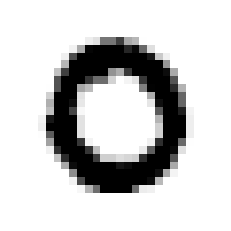

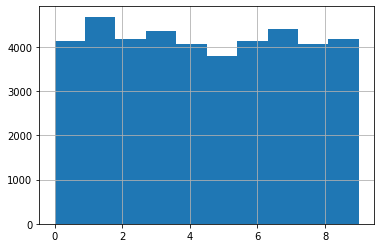

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


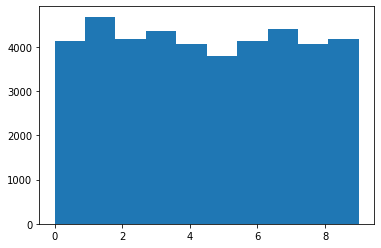

In [3]:
# print one number
myNumber = data[1,1:]
print (myNumber[:5])
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
mnist['label'].hist()
plt.show()
print(mnist.columns)
plt.hist(data[:,0])
plt.show()

In [4]:
mnist_test = pd.read_csv('MnistTest.csv')
mnist_test.info()
mnist_test.index.name='ImageId'

mnist_test['label']=1

mnist_test.index+=1
mnist_test['label'].to_csv('MnistOne.csv', index=True, header=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [18]:
#rnd_pca = PCA(n_components=154)
#rnd_pca = PCA(n_components=169)
rnd_pca = PCA(n_components=4)

rnd_pca.fit(data[:,1:])
X_reduced = rnd_pca.transform(data[:,1:])
print (X_reduced.shape)

(42000, 4)


28


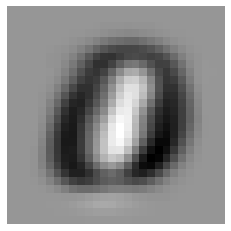

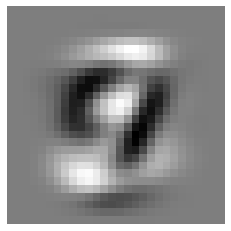

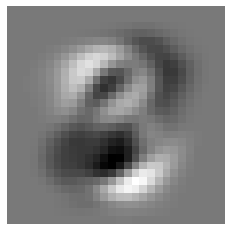

In [20]:
#eigennumbers = rnd_pca.components_.reshape((154,28,28))
#eigennumbers = rnd_pca.components_.reshape((169,28,28))
eigennumbers = rnd_pca.components_.reshape((4,28,28))
myNumber = eigennumbers[0]
print (len(myNumber))
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
myNumber = eigennumbers[1]
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()
myNumber = eigennumbers[2]
myNumber=myNumber.reshape((28,28))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

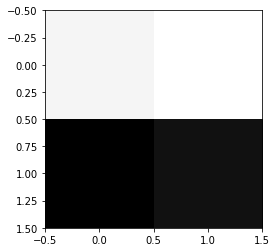

In [22]:
import math
myNumber = X_reduced[0,:]
myNumber=myNumber.reshape((2,2))
plt.imshow(myNumber, cmap = plt.cm.binary,
           interpolation="nearest")
plt.show()

In [ ]:
#clf1 = LogisticRegression(max_iter=10000, solver='saga',)

clf1.fit(data[:,1:], data[:, 0] )

In [23]:
clf1 = LogisticRegression(solver='saga',
                        max_iter=10000)
clf1.fit(X_reduced, data[:, 0] )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
predict = clf1.predict(X_reduced)
print("Accuracy = ", accuracy_score(predict, data[:, 0]))

Accuracy =  0.5607619047619048


In [28]:
mnistTest = pd.read_csv('MnistTest.csv')
test = mnistTest.values
XTest_reduced = rnd_pca.transform(test)
print(XTest_reduced.shape)
predict = clf1.predict(XTest_reduced)

(28000, 4)


In [29]:
mnistTest.info()
mnistTest.index.name='ImageId'

mnistTest['label']=predict

mnistTest.index+=1
mnistTest['label'].to_csv('Mnist2x2.csv', index=True, header=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
